##  1.

In [9]:
#packages
import keras

import numpy as np

from keras.models import Sequential

from keras.layers import Dense, Activation

X = np.random.randint(10, size=(20,1))


y = np.random.randint(2, size=(20,1))




model = Sequential()

model.add(Dense(4, input_dim=1, activation='relu'))

model.add(Dense(2, input_dim=1, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(loss="mean_squared_error", optimizer="adam")  

model.fit(X, y, epochs=50)




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 8         
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1/1 [==============================] - 0s 159ms/step - loss: 0.2374
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2371
Epoch 3/50
1/1 [==============================] - 0s 999us/step - loss: 0.2367
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2365
Epoch

# Question 2.


In [2]:
#packages
import sys

import cv2
import numpy as np


# Grayscale Image
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image

#convolving function
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))
    print('kernel = ', kernel)
    print(kernel.shape)

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = 10
    yImgShape = 10

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((10 + padding*2, 10 + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(10):
        # Exit Convolution
        if y > 10 - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(10):
                # Go to next row once kernel is out of bounds
                if x > 10 - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

#main function
if __name__ == '__main__':
    # Grayscale Image
    image = processImage('px10.jpg')
    print('image = ', image)
    print(image.shape)
    
    
    
    # Edge Detection Kernel
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    
    # Convolve and Save Output
    output = convolve2D(image, kernel, padding=2)
    x=cv2.imwrite('convolved.jpg', output)
    if(x):
        print("Image saved as convolved.png.")













image =  [[ 78  79  24  18   0  57  44  36  70  29]
 [139  86  63   4  22  13  18  40  69  55]
 [136 125  75  33  17   0   2  32  54  74]
 [ 55 141  96  64  25   1  21   9  27  62]
 [  5  92 149  73  64   9  27   0  12  28]
 [ 17  40 146 109  74  50   0  15  11   5]
 [ 28  21  78 141  82  82  11  19   9   8]
 [ 18  12  27 125 121  67  77   1   3  22]
 [  4  25  25  40 165  82  75  57   4   5]
 [ 38  25  10   7  69 151  98  58   3   5]]
(10, 10)
kernel =  [[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
(3, 3)
Image saved as convolved.png.


# # Question 3 (d).

Vocab size:  19
Words: {'as', 'soon', 'trial', 'data', 'that', 'public', 'the', 'accepted', 'stipulated', 'immunization', 'clinical', 'made', 'also', 'program', 'be', 'children', 'but', 'bench', 'possible'}
Total number of sentenses are: 2

 before sentence:  the bench also accepted the children immunization program but stipulated that the clinical trial data be made public as soon as possible.

 after
0 : ['the', 'bench']
1 : ['the', 'also']
2 : ['bench', 'the']
3 : ['bench', 'also']
4 : ['bench', 'accepted']
5 : ['also', 'the']
6 : ['also', 'bench']
7 : ['also', 'accepted']
8 : ['also', 'the']
9 : ['accepted', 'bench']
10 : ['accepted', 'also']
11 : ['accepted', 'the']
12 : ['accepted', 'children']
13 : ['the', 'also']
14 : ['the', 'accepted']
15 : ['the', 'children']
16 : ['the', 'immunization']
17 : ['children', 'accepted']
18 : ['children', 'the']
19 : ['children', 'immunization']
20 : ['children', 'program']
21 : ['immunization', 'the']
22 : ['immunization', 'children']
23 : ['im

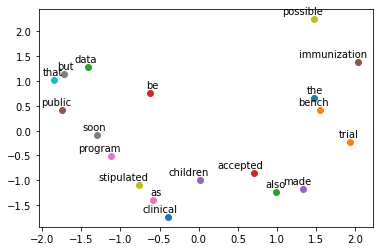

In [5]:
import numpy as np
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#from nltk.tokenize import word_tokenize 




corpus_raw = 'The bench also accepted the children immunization program, but stipulated that the clinical trial data be made public as soon as possible.'
# convert to lower case
corpus_raw = corpus_raw.lower()
corpus_raw = corpus_raw.replace(",", "")
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word.replace(".", ""))
words = set(words) # so that all duplicate words are removed

# words = word_tokenize(corpus_raw)         
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
print('Vocab size: ', vocab_size)
print('Words:', words)

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word
# print('index of "manchester" is :',word2int['england'])
# print('word in 1 index is :', int2word[1])



# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []

print( 'Total number of sentenses are:', len(raw_sentences))
for i, sentence in enumerate(raw_sentences):
        sentences.append(sentence.split())
#        print(i , ':', sentence.split())

#using fixed window size, pairs of word are created for input
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])
print('\n before sentence: ', corpus_raw)
print('\n after')

for i, eachpair in enumerate(data):
    print(i, ':', eachpair)



# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = [] # input word
y_train = [] # output word
labelss = []
for i, data_word in enumerate(data):
    
    x_train.append((word2int[data_word[0]]))
    if data_word[0] not in labelss:
        labelss.append(data_word[0] )
    y_train.append((word2int[ data_word[1] ]))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print('words: ', words)
print('X : \n', x_train)
print('\nY: \n', y_train)




labelss

y_train = y_train.reshape((-1, 1))

x_train

len(y_train)
def get_batch(size):
    assert size<len(data)
    X=[]
    Y=[]
    rdm = np.random.choice(range(len(data)), size, replace=False)
    
    for r in rdm:
        X.append(word2int[data[r][0]])
        Y.append([word2int[data[r][1]]])
    return X, Y

print('Batches (x, y)', get_batch(3))

get_batch(1)

get_batch(2)

get_batch(4)

BATCH_SIZE = 10
VOCAB_SIZE = vocab_size #12
EMBED_SIZE = 5
NUM_SAMPLED= 6
LEARNING_RATE =1.0 # 1e-1
X = tf.placeholder(tf.int32, shape=[BATCH_SIZE])
Y = tf.placeholder(tf.int32, shape=[BATCH_SIZE, 1])

with tf.device("/cpu:0"):
    embed_matrix = tf.Variable(tf.random_uniform([VOCAB_SIZE, EMBED_SIZE], -1.0, 1.0)) #12,5 
    embed = tf.nn.embedding_lookup(embed_matrix, X) #50 , 3

#X.shape, Y.shape, embed_matrix.shape, embed.shape


# tf.nn.nce_loss(weights, biases, labels, inputs, num_sampled, num_classes, num_true=1,
# sampled_values=None, remove_accidental_hits=False, partition_strategy='mod',name='nce_loss')
nce_weight = tf.Variable(tf.random_uniform([VOCAB_SIZE, EMBED_SIZE],-1.0,1.0)) # (12, 5)
nce_bias = tf.Variable(tf.zeros([VOCAB_SIZE]))#12


#nce_weight, nce_bias

loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_weight,
                                     biases=nce_bias,
                                     labels=Y,
                                     inputs=embed,
                                     num_sampled=NUM_SAMPLED,
                                     num_classes=VOCAB_SIZE
                                    ))
#print (loss)

optimizer = tf.train.AdamOptimizer(1e-1).minimize(loss)

epochs = 10000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range (epochs):
        batch_inputs, batch_labels = get_batch(BATCH_SIZE)
        _,loss_val = sess.run([optimizer,loss],feed_dict={X: batch_inputs, Y: batch_labels})
    
        if epoch % 1000 == 0:
            print("Loss at", epoch, loss_val )
        
    temp = embed_matrix.eval()
# words


temp

len(y_train)
temp.shape

# fit a 2d PCA model to the vectors
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
trained_embeedings = pca.fit_transform(temp)
trained_embeedings

labelss
import matplotlib.pyplot as plt
#show word2vec if dim is 2
if trained_embeedings.shape[1] == 2:
    #labels = data[:10] #Show top 10 words
#     plt.xlim(-2.5, 2.4)
#     plt.ylim(-2.0, 2.2)
    for i, label in enumerate(labelss):
        x,y = trained_embeedings[i,:]
        plt.scatter(x,y)
        plt.annotate(label, xy=(x,y), xytext=(9,3),textcoords='offset points', ha='right', va='bottom')
        #plt.savefig('word2vev.png')
    plt.show()



